In [1]:
import os
import gc
import ot
import pickle
import anndata
import scanpy as sc
import pandas as pd
import numpy as np
from scipy import sparse
from scipy.stats import spearmanr, pearsonr
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

import commot as ct

In [2]:
adata = sc.read("/gpfs/gibbs/pi/zhao/tl688/seqfishdata/data/Mouse_brain/HybISS_celltype.h5ad")

In [3]:
adata.var_names_make_unique()
adata.raw = adata
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
adata.obsm['spatial'] = adata.obsm['X_xy_loc'] * np.array([[1, -1]])

In [4]:
adata_dis500 = adata.copy()

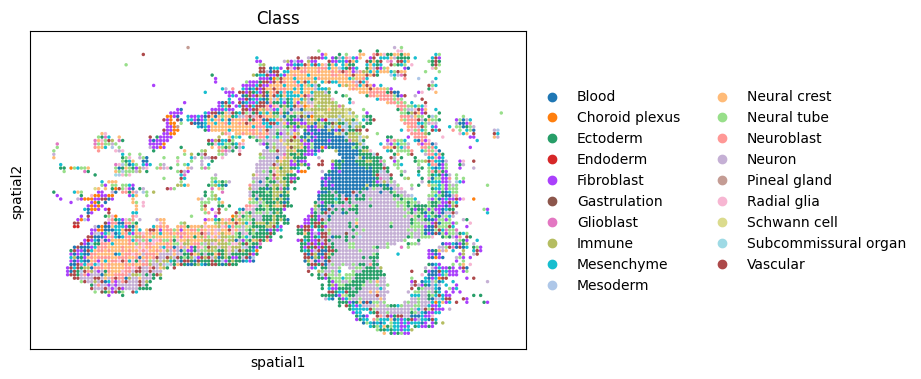

In [5]:
# sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
# adata = adata[:, adata.var.highly_variable]
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.4)
sc.pl.spatial(adata, color='Class', spot_size = 1)

In [6]:
df_cellchat = ct.pp.ligand_receptor_database(species='mouse', signaling_type='Secreted Signaling', database='CellChat')
print(df_cellchat.shape)

(1209, 4)


In [7]:
df_cellchat_filtered = ct.pp.filter_lr_database(df_cellchat, adata_dis500, min_cell_pct=0.05)
print(df_cellchat_filtered.shape)

(9, 4)


In [30]:
print(df_cellchat_filtered.head())

       0      1      2                   3
0  Wnt5a  Fzd10  ncWNT  Secreted Signaling
1  Wnt5a   Fzd5  ncWNT  Secreted Signaling
2  Wnt5a   Fzd8  ncWNT  Secreted Signaling
3  Wnt5b  Fzd10  ncWNT  Secreted Signaling
4  Wnt5b   Fzd5  ncWNT  Secreted Signaling


In [31]:
ct.tl.spatial_communication(adata_dis500,
    database_name='cellchat', df_ligrec=df_cellchat_filtered, dis_thr=1, heteromeric=True, pathway_sum=True)

In [32]:
adata_dis500

AnnData object with n_obs × n_vars = 4628 × 119
    obs: 'n_counts', 'Class'
    var: 'GeneName'
    uns: 'log1p', 'commot-cellchat-info'
    obsm: 'X_xy_loc', 'xy_loc', 'spatial', 'commot-cellchat-sum-sender', 'commot-cellchat-sum-receiver'
    obsp: 'commot-cellchat-Wnt5b-Fzd5', 'commot-cellchat-Wnt5b-Fzd8', 'commot-cellchat-Wnt5b-Fzd10', 'commot-cellchat-Wnt5a-Fzd5', 'commot-cellchat-Wnt5a-Fzd8', 'commot-cellchat-Wnt5a-Fzd10', 'commot-cellchat-Fgf17-Fgfr3', 'commot-cellchat-Fgf8-Fgfr3', 'commot-cellchat-Fgf15-Fgfr3', 'commot-cellchat-FGF', 'commot-cellchat-ncWNT', 'commot-cellchat-total-total'

In [33]:
ct.tl.communication_direction(adata_dis500, database_name='cellchat', pathway_name='FGF', k=5)

<Axes: >

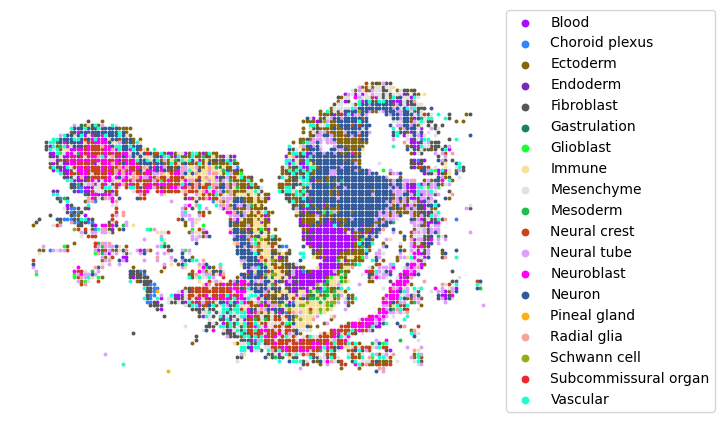

In [ ]:
ct.pl.plot_cell_communication(adata_dis500, database_name='cellchat', pathway_name='FGF', plot_method='grid', background_legend=True,
    scale=0.1, ndsize=8, grid_density=0.4, grid_scale=0.15, summary='sender', background='cluster', clustering='Class', cmap='Alphabet',
    normalize_v = True, normalize_v_quantile=0.7) #original data

In [8]:
import os
import gc
import ot
import pickle
import anndata
import scanpy as sc
import pandas as pd
import numpy as np
from scipy import sparse
from scipy.stats import spearmanr, pearsonr
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

import commot as ct

In [9]:
adata = sc.read("/gpfs/gibbs/pi/zhao/tl688/seqfishdata/data/Mouse_brain/gimvigat_mb_all600.h5ad") #nlatent32, 600
adata_raw = sc.read("/gpfs/gibbs/pi/zhao/tl688/seqfishdata/data/Mouse_brain/HybISS_celltype.h5ad")

In [10]:
adata.X = adata.layers['spliced']

In [11]:
adata.var_names_make_unique()
adata.raw = adata
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
adata.obsm['spatial'] = adata_raw.obsm['X_xy_loc'] * np.array([[1, -1]])

In [12]:
# adata_dis500 = adata.copy()

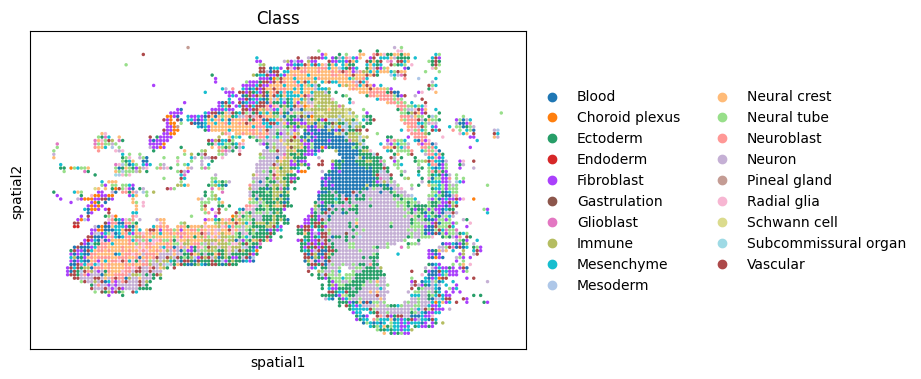

In [13]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5, n_top_genes=2000)
adata = adata[:, adata.var.highly_variable]
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.4)
sc.pl.spatial(adata, color='Class', spot_size = 1)

In [14]:
adata.X

array([[0.0168949 , 0.13079454, 0.11278326, ..., 0.03163195, 0.03709219,
        0.07678476],
       [0.03038048, 0.09517469, 0.07156607, ..., 0.01535019, 0.01081434,
        0.0363001 ],
       [0.04341758, 0.13347834, 0.12389246, ..., 0.02605912, 0.02527388,
        0.04071615],
       ...,
       [0.02209651, 0.13867125, 0.13820897, ..., 0.02983898, 0.03379585,
        0.04851147],
       [0.03444069, 0.1543147 , 0.13864252, ..., 0.03626662, 0.04091007,
        0.03753205],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [15]:
adata_dis500 = adata.copy()

In [28]:
adata_dis500 

AnnData object with n_obs × n_vars = 4628 × 2000
    obs: 'n_counts', 'Class', 'names', 'ind_x', '_scvi_batch', '_scvi_labels', '_scvi_ind_x', 'leiden'
    var: 'GeneName', 'gene_count_corr', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'Class_colors', 'commot-cellchat-info'
    obsm: 'imputed', 'imputed_raw', 'imputed_raw_theta', 'spatial', 'X_pca', 'X_umap', 'commot-cellchat-sum-sender', 'commot-cellchat-sum-receiver', 'commot_sender_vf-cellchat-ANGPTL', 'commot_receiver_vf-cellchat-ANGPTL', 'commot_sender_vf-cellchat-CXCL', 'commot_receiver_vf-cellchat-CXCL'
    varm: 'PCs'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities', 'commot-cellchat-Sema3a-Nrp1_Plxna4', 'commot-cellchat-Pros1-Axl', 'commot-cellchat-Nppc-Npr2', 'commot-cellchat-Angptl4-Cdh5', 'commot-cellchat-Angptl4-Sdc1', 'commot-cellchat-Angptl4-Cdh11', 'commot-cellchat-Angptl4-Sdc2', 'commot-cellchat-Angptl4-Sdc4', 'co

In [16]:
df_cellchat = ct.pp.ligand_receptor_database(species='mouse', signaling_type='Secreted Signaling', database='CellChat')
print(df_cellchat.shape)

(1209, 4)


In [17]:
df_cellchat_filtered = ct.pp.filter_lr_database(df_cellchat, adata_dis500, min_cell_pct=0.05)
print(df_cellchat_filtered.shape)

(31, 4)


In [18]:
print(df_cellchat_filtered.head())

       0      1    2                   3
0   Fgf8  Fgfr3  FGF  Secreted Signaling
1  Fgf17  Fgfr3  FGF  Secreted Signaling
2   Fgf9  Fgfr3  FGF  Secreted Signaling
3  Fgf20  Fgfr3  FGF  Secreted Signaling
4  Fgf15  Fgfr3  FGF  Secreted Signaling


In [19]:
ct.tl.spatial_communication(adata_dis500,
    database_name='cellchat', df_ligrec=df_cellchat_filtered, dis_thr=1, heteromeric=True, pathway_sum=True)

In [30]:
adata_dis500

AnnData object with n_obs × n_vars = 4628 × 2000
    obs: 'n_counts', 'Class', 'names', 'ind_x', '_scvi_batch', '_scvi_labels', '_scvi_ind_x', 'leiden'
    var: 'GeneName', 'gene_count_corr', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'Class_colors', 'commot-cellchat-info'
    obsm: 'imputed', 'imputed_raw', 'imputed_raw_theta', 'spatial', 'X_pca', 'X_umap', 'commot-cellchat-sum-sender', 'commot-cellchat-sum-receiver', 'commot_sender_vf-cellchat-ANGPTL', 'commot_receiver_vf-cellchat-ANGPTL', 'commot_sender_vf-cellchat-CXCL', 'commot_receiver_vf-cellchat-CXCL'
    varm: 'PCs'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities', 'commot-cellchat-Sema3a-Nrp1_Plxna4', 'commot-cellchat-Pros1-Axl', 'commot-cellchat-Nppc-Npr2', 'commot-cellchat-Angptl4-Cdh5', 'commot-cellchat-Angptl4-Sdc1', 'commot-cellchat-Angptl4-Cdh11', 'commot-cellchat-Angptl4-Sdc2', 'commot-cellchat-Angptl4-Sdc4', 'co

In [21]:
a = 1

In [22]:
a = 1

In [23]:
a

1

In [24]:
ct.tl.communication_direction(adata_dis500, database_name='cellchat', pathway_name='ANGPTL', k=5)

In [31]:
ct.pl.plot_cell_communication(adata_dis500, database_name='cellchat', pathway_name='ANGPTL', plot_method='grid', background_legend=True,
    scale=0.1, ndsize=8, grid_density=0.4, grid_scale=0.15, summary='sender', background='cluster', clustering='Class', cmap='Alphabet',
    normalize_v = True, normalize_v_quantile=0.7,)

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
#automatically transfer

In [26]:
ct.tl.communication_direction(adata_dis500, database_name='cellchat', pathway_name='CXCL', k=5)

<Axes: >

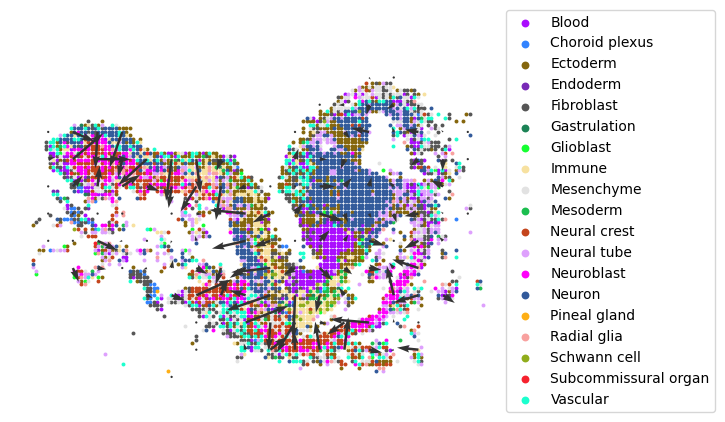

In [27]:
ct.pl.plot_cell_communication(adata_dis500, database_name='cellchat', pathway_name='CXCL', plot_method='grid', background_legend=True,
    scale=0.1, ndsize=8, grid_density=0.4, grid_scale=0.15, summary='sender', background='cluster', clustering='Class', cmap='Alphabet',
    normalize_v = True, normalize_v_quantile=0.7)

In [20]:
ct.tl.communication_direction(adata_dis500, database_name='cellchat', pathway_name='ANGPTL', k=5)

<Axes: >

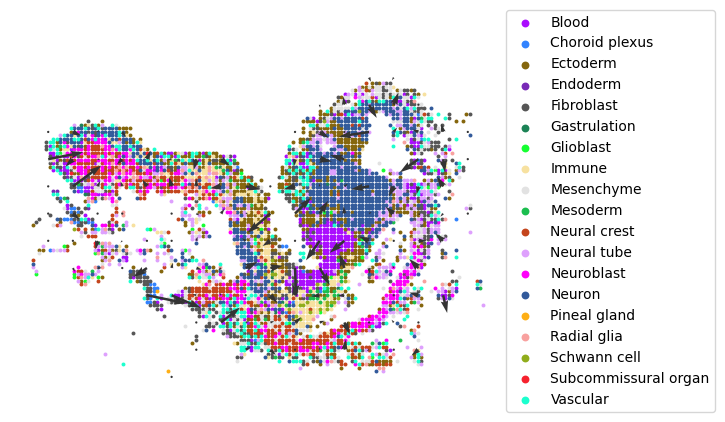

In [22]:
ct.pl.plot_cell_communication(adata_dis500, database_name='cellchat', pathway_name='ANGPTL', plot_method='grid', background_legend=True,
    scale=0.1, ndsize=8, grid_density=0.4, grid_scale=0.15, summary='sender', background='cluster', clustering='Class', cmap='Alphabet',
    normalize_v = True, normalize_v_quantile=0.7)